## Usage notes
This toolkit works in the following order:

- Set up the input data
- Create model (SM, MOSM, CSM, SM-LMC, CONV)
- Make an estimation of the model parameters using BNSE+SM
- Train the model parameters
- Set the prediction range
- Do a prediction

For example:
```
import mogptk

x, y = get_your_data()

data = mogptk.Data(x, y)
data.set_pred_range(0.0, 5.0, n=200)

mosm = mogptk.MOSM(data, Q=3)
mosm.estimate_params()
mosm.train()
mosm.predict()

data.plot()
```

In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

import matplotlib as plt
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
#data = mogptk.LoadCSV('data/jura.csv', ['X', 'Y'], 'Cd')
#data.remove_range(start=2.0, end=None)
#data.remove_randomly(pct=0.90)
#data.plot()

In [3]:
#import pandas as pd
#df = pd.DataFrame({'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'y': [3, 4, 4, 5, 5, 6, 7, 8, 9, 11]})
#data = mogptk.LoadDataFrame(df, 'x', 'y')
#data.plot()

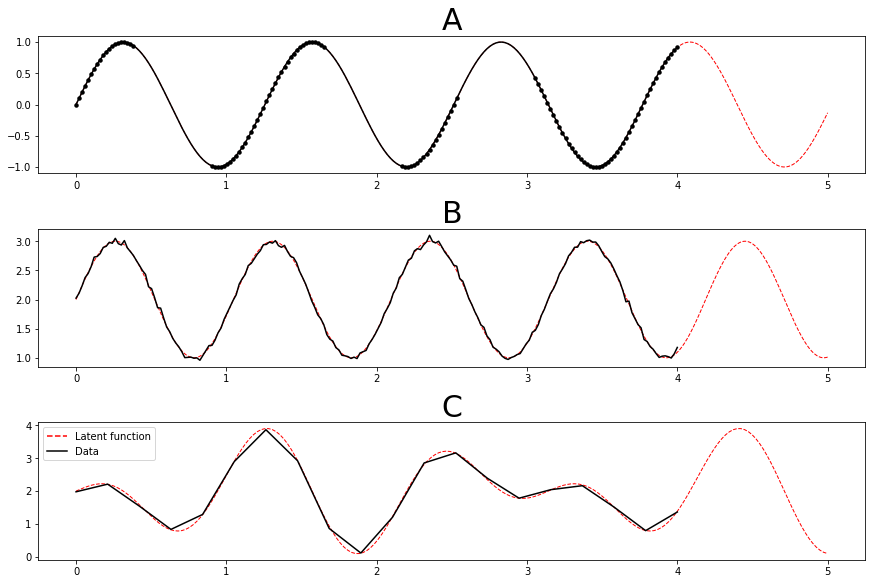

In [4]:
data = mogptk.DataSet()
data.append(mogptk.LoadFunction(lambda x: np.sin(5*x[:,0]), n=200, start=0.0, end=4.0, name='A'))
data.append(mogptk.LoadFunction(lambda x: np.sin(6*x[:,0])+2, n=200, start=0.0, end=4.0, var=0.03, name='B'))
data.append(mogptk.LoadFunction(lambda x: np.sin(6*x[:,0])+2 - np.sin(4*x[:,0]), n=20, start=0.0, end=4.0, var=0.03, name='C'))

data['A'].remove_random_ranges(3, 0.5)

data.set_pred_range(0.0, 5.0, n=200)

data.plot();

In [ ]:
#data[0].transform(mogptk.TransformLog)
data[0].plot()

In [ ]:
data[0].plot_spectrum()

## SM

In [ ]:
sm = mogptk.SM(data[0], Q=3)
display(sm.get_params())

In [ ]:
sm.estimate_params()
display(sm.get_params())
sm.plot_psd()

In [ ]:
sm.train(method='BFGS')
display(sm.get_params())
sm.plot_psd()

In [ ]:
sm.predict(plot=True)

## MOSM

In [ ]:
mosm = mogptk.MOSM(data, Q=3)
mosm.print_params()

In [ ]:
mosm.estimate_params(method='SM')
mosm.print_params()

In [ ]:
mosm.train()
mosm.print_params()

In [ ]:
mosm.predict(plot=True)

### Plot

In [ ]:
mosm.plot()

In [ ]:
mosm.plot_psd()

In [ ]:
mosm.plot_correlations()

In [ ]:
mosm.info()

### Saving and loading

In [ ]:
mosm.save_params('mosm')
mosm.print_params()

In [ ]:
mosm2 = mogptk.MOSM(data, Q=3)
mosm2.load_params('mosm')
mosm2.print_params()

In [ ]:
mosm2.predict(plot=True)

## SM-LMC

In [ ]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
smlmc.print_params()

In [ ]:
smlmc.estimate_params(method='BNSE')
smlmc.print_params()

In [ ]:
smlmc.train()
smlmc.print_params()

In [ ]:
smlmc.predict(plot=True)

## CSM

In [ ]:
csm = mogptk.CSM(data, Q=3, Rq=1)
csm.print_params()

In [ ]:
csm.estimate_params(method='BNSE')
csm.print_params()

In [ ]:
csm.train()
csm.print_params()

In [ ]:
csm.predict(plot=True)

## CONV

In [5]:
conv = mogptk.CONV(data, Q=3)
conv.print_params()

Q=0,constant,variance
A,0.083,[1.000e-06]
B,0.083,[1.000e-06]
C,0.410,[1.000e-06]
Q=1,constant,variance
A,0.320,[1.000e-06]
B,0.081,[1.000e-06]
C,0.659,[1.000e-06]
Q=2,constant,variance
A,0.189,[1.000e-06]
B,0.542,[1.000e-06]


Likelihood,variance
,0.9999999999999999


In [6]:
conv.estimate_params(method='SM')
conv.print_params()

Done in 0.0 minutes
Done in 0.1 minutes
Done in 0.0 minutes
[{'weight': array([[9.99999997e-07, 3.82554867e-04, 6.28000394e-01]]), 'mean': array([[6.28318531e-06, 6.28318531e-06, 6.28318531e-06]]), 'scale': array([[9.99999997e-07, 5.19324457e+01, 1.44132401e+01]])}, {'weight': array([[1.28347090e+01, 1.68621412e-04, 6.28000394e-01]]), 'mean': array([[6.28318531e-06, 6.28318531e-06, 6.28318531e-06]]), 'scale': array([[ 0.25858373, 46.51777587, 48.37549213]])}, {'weight': array([[9.99999997e-07, 8.09976984e+00, 6.28000394e-01]]), 'mean': array([[6.28318531e-06, 6.28318531e-06, 6.28318531e-06]]), 'scale': array([[43.61630829,  0.34300786, 69.55205251]])}]


Q=0,constant,variance
A,0.000,[1.000e-06]
B,0.002,[51.932]
C,2.998,[14.413]
Q=1,constant,variance
A,2.860,[0.259]
B,0.000,[46.518]
C,0.140,[48.375]
Q=2,constant,variance
A,0.000,[43.616]
B,2.784,[0.343]


Likelihood,variance
,0.9999999999999999


In [7]:
conv.train(method='Adam')
conv.print_params()

Done in 0.0 minutes


Q=0,constant,variance
A,0.000,[1.000e-06]
B,0.002,[51.933]
C,2.997,[14.412]
Q=1,constant,variance
A,2.859,[0.258]
B,0.000,[46.518]
C,0.140,[48.374]
Q=2,constant,variance
A,0.000,[43.616]
B,2.783,[0.343]


Likelihood,variance
,0.9993679960961781


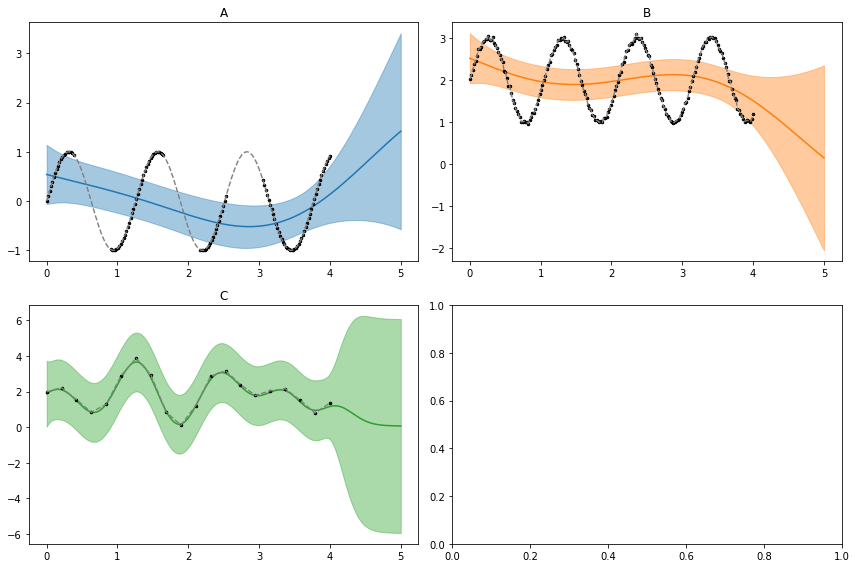

In [8]:
conv.predict(plot=True)

## Errors